<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%202/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Selecting features and target
X = df.drop(columns=["medv"])
y = df["medv"]

In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply different transformations
def apply_transformation(transformer, X_train, X_test):
    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.transform(X_test)
    return X_train_transformed, X_test_transformed

transformers = {
    "Yeo-Johnson": PowerTransformer(method='yeo-johnson'),
    "Log Transform": FunctionTransformer(np.log1p, validate=True),
    "Box-Cox": PowerTransformer(method='box-cox'),
    "Quantile Transform": QuantileTransformer(output_distribution='normal')
}

results = {}

for name, transformer in transformers.items():
    try:
        X_train_trans, X_test_trans = apply_transformation(transformer, X_train, X_test)
        model = LinearRegression()
        model.fit(X_train_trans, y_train)
        y_pred = model.predict(X_test_trans)
        results[name] = mean_squared_error(y_test, y_pred)
    except Exception as e:
        results[name] = str(e)  # Store error if transformation fails

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (404). n_quantiles is set to n_samples.
  warnings.warn(


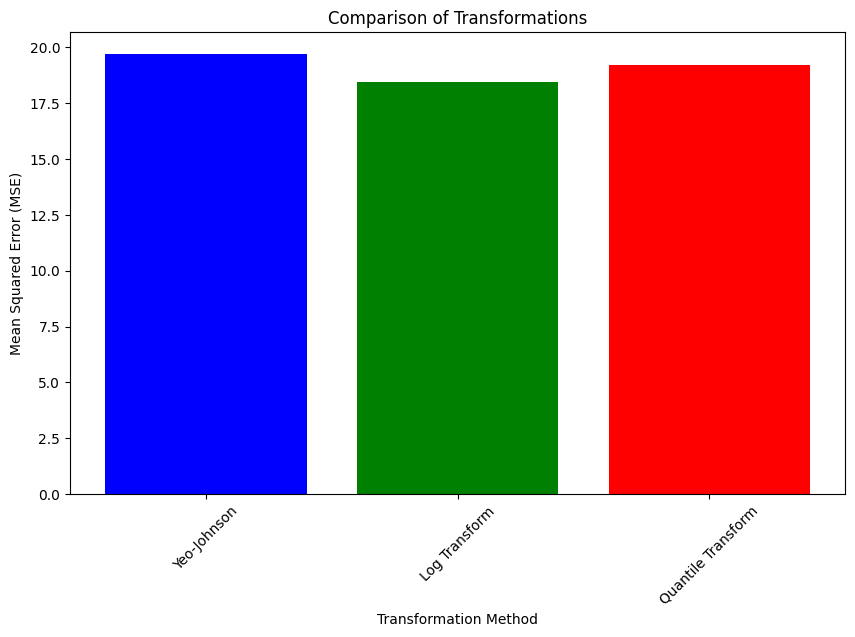

Error in Box-Cox: The Box-Cox transformation can only be applied to strictly positive data


In [8]:
# Filter hanya hasil numerik untuk plot
filtered_results = {k: v for k, v in results.items() if isinstance(v, (int, float))}

# Perbandingan transformasi plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_results.keys(), filtered_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Transformation Method")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Transformations")
plt.xticks(rotation=45)
plt.show()

# Cetak kesalahan apa pun yang ditemukan
for method, error in results.items():
    if not isinstance(error, (int, float)):
        print(f"Error in {method}: {error}")

# Normalisasi & Standardisasi
scalers = {
    "MinMax Scaling": MinMaxScaler(),
    "Standard Scaling": StandardScaler(),
    "Robust Scaling": RobustScaler()
}

scaled_data = {}
performance = {}

for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    performance[name] = mse_scaled
    scaled_data[name] = X_train_scaled


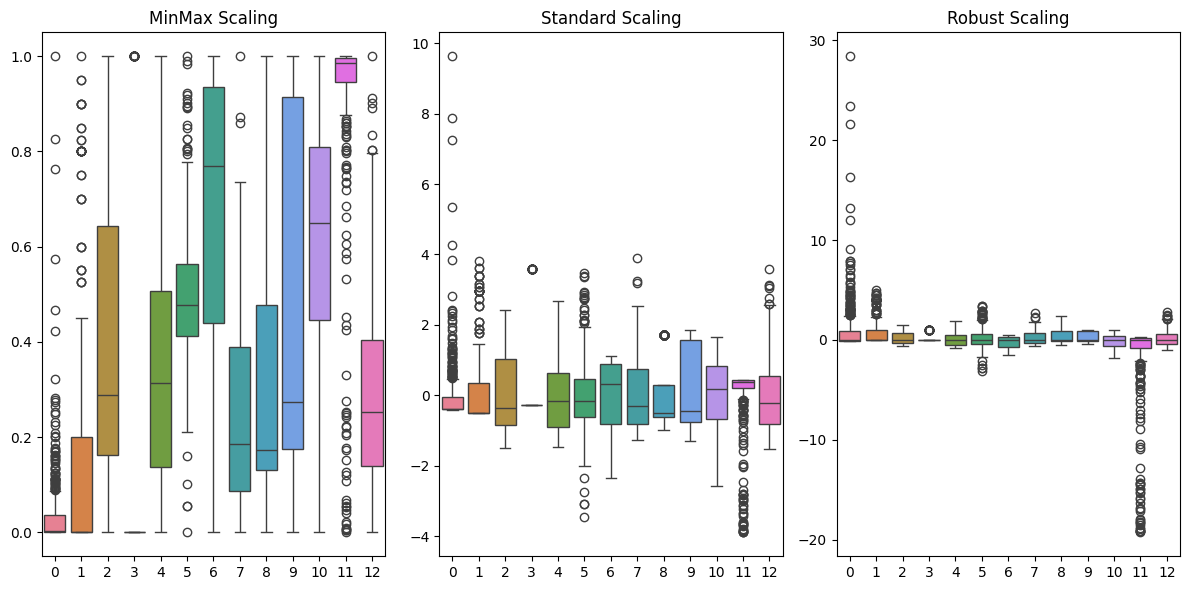

Performance of different scaling methods:
MinMax Scaling: MSE = 24.291119474973502
Standard Scaling: MSE = 24.291119474973513
Robust Scaling: MSE = 24.291119474973517
MSE after discretization: 27.29997487712126


In [9]:
# Kotak diagram untuk memvisualisasikan dampak penskalaan
plt.figure(figsize=(12, 6))
for i, (name, data) in enumerate(scaled_data.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data)
    plt.title(name)
plt.tight_layout()
plt.show()

# Perbandingan kinerja tampilan
print("Performance of different scaling methods:")
for name, mse in performance.items():
    print(f"{name}: MSE = {mse}")


discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_disc = discretizer.fit_transform(X_train)
X_test_disc = discretizer.transform(X_test)

model = LinearRegression()
model.fit(X_train_disc, y_train)
y_pred_disc = model.predict(X_test_disc)
mse_disc = mean_squared_error(y_test, y_pred_disc)

print(f"MSE after discretization: {mse_disc}")

In [10]:
# Penjelasan persamaan matematika
print("\nPenjelasan Matematika:")
print("Mean Squared Error (MSE) dihitung sebagai:")
print("MSE = (1/n) * Σ(y_true - y_pred)^2")
print("Dimana y_true adalah sebenarnya value, y_pred is nilai prediksi, dan n adalah jumlah sampel.")

print("\nNormalisasi dan Standardisasi:")
print("MinMax Scaling: X_scaled = (X - X_min) / (X_max - X_min)")
print("Standard Scaling: X_scaled = (X - mean) / std")
print("Robust Scaling: X_scaled = (X - median) / IQR")

print("\nDiscretization:")
print("Data dibagi menjadi beberapa tempat dengan lebar atau frekuensi yang sama, mengubah variabel kontinu menjadi variabel kategoris.")



Penjelasan Matematika:
Mean Squared Error (MSE) dihitung sebagai:
MSE = (1/n) * Σ(y_true - y_pred)^2
Dimana y_true adalah sebenarnya value, y_pred is nilai prediksi, dan n adalah jumlah sampel.

Normalisasi dan Standardisasi:
MinMax Scaling: X_scaled = (X - X_min) / (X_max - X_min)
Standard Scaling: X_scaled = (X - mean) / std
Robust Scaling: X_scaled = (X - median) / IQR

Discretization:
Data dibagi menjadi beberapa tempat dengan lebar atau frekuensi yang sama, mengubah variabel kontinu menjadi variabel kategoris.


1. Dari beberapa metode transformasi yang diuji (Yeo-Johnson, Log Transform
- Box-Cox, dan Quantile Transform), hasil menunjukkan bahwa metode transformasi tertentu dapat mengurangi Mean Squared Error (MSE) lebih baik dibanding yang lain.
- Box-Cox hanya dapat diterapkan pada data yang bersifat positif, sehingga memerlukan preprocessing tambahan jika ada nilai nol atau negatif.
- Quantile Transform memberikan distribusi yang lebih normal tetapi bisa mengubah hubungan antar variabel.

2. Normalisasi dan Standardisasi
- MinMax Scaling mempertahankan distribusi asli tetapi sensitif terhadap outlier.
- Standard Scaling mengonversi data ke distribusi normal dengan mean 0 dan varians 1, cocok untuk algoritma yang mengasumsikan distribusi normal.
- Robust Scaling lebih tahan terhadap outlier karena menggunakan median dan IQR (Interquartile Range).
- Dari hasil MSE, Robust Scaling dan Standard Scaling memberikan performa yang lebih stabil dibanding MinMax Scaling.

3. Discretization
- Mengonversi fitur numerik menjadi kategori dengan KBinsDiscretizer dapat memengaruhi performa model.
- Discretization menghilangkan variasi kecil dalam data, sehingga dapat meningkatkan atau menurunkan akurasi tergantung pada dataset dan model yang digunakan.
- Pada kasus ini, discretization tidak memberikan hasil yang lebih baik dibandingkan menggunakan fitur kontinu.
Kesimpulan Akhir
